In [8]:
%matplotlib widget 

import scipy
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from itertools import combinations
# from multiprocessing import Pool
from itertools import starmap
import time
import functools
from scipy.interpolate import CloughTocher2DInterpolator

############################
# Setup global variables:  #
############################
n = 4
symbols = sp.symbols('a_:'+str(n**2))
matrix = sp.Matrix(n,n, symbols)

def sum_kth_principal_minors(matrix, k):
    """Compute the sum of the k-th principal minors of a given matrix."""
    principal_minor_sum = 0
    
    # Get all combinations of row indices for k x k principal minors
    for indices in combinations(range(n), k):
        minor = matrix[indices, indices]  # Extract the k x k principal minor
        principal_minor_sum += minor.det()  # Add the determinant of the minor
    
    return principal_minor_sum

def run_function_with_constraints(loc, constraints = []):
    """Given a function and some constraint functions attempt to minimize the function"""
    bounds = [(0.0, np.inf)] * n**2
    num_starts = 5
    results = []
    
    for _ in range(num_starts):
        initial_guess = np.random.rand(n**2)
        #result = minimize(funcs_of_principal_minors[loc], initial_guess, bounds=bounds, constraints=constraints, method='trust-constr')
        result = minimize(funcs_of_principal_minors[loc], initial_guess, bounds=bounds, constraints=constraints, method='SLSQP')
        results.append(result)
    
    return min(results, key=lambda x: x.fun)

def run_function_with_constraints_and_equal(val, loc, func_num):
    constraints_and_func_1 = ({'type': 'eq', 'fun': lambda x : (funcs_of_principal_minors[loc](x) - val)},)
    return run_function_with_constraints(func_num, constraints_and_func_1)

def run_function_with_constraints_and_double_equal(val_1, val_2, loc_1, loc_2, func_num):
    constraints_and_func_2 = matrix_constraints + ({'type': 'eq', 'fun': lambda x : (funcs_of_principal_minors[loc_1](x) - val_1)},) + ({'type': 'eq', 'fun': lambda x : (funcs_of_principal_minors[loc_2](x) - val_2)},)
    return run_function_with_constraints(func_num, constraints_and_func_2)

funcs_of_principal_minors = tuple(
    sp.lambdify([matrix[:]], sum_kth_principal_minors(matrix, k), 'numpy')
    for k in range(1, n+1)
) + tuple(
    sp.lambdify([matrix[:]], -1*sum_kth_principal_minors(matrix, k), 'numpy')
    for k in range(1, n+1)
)


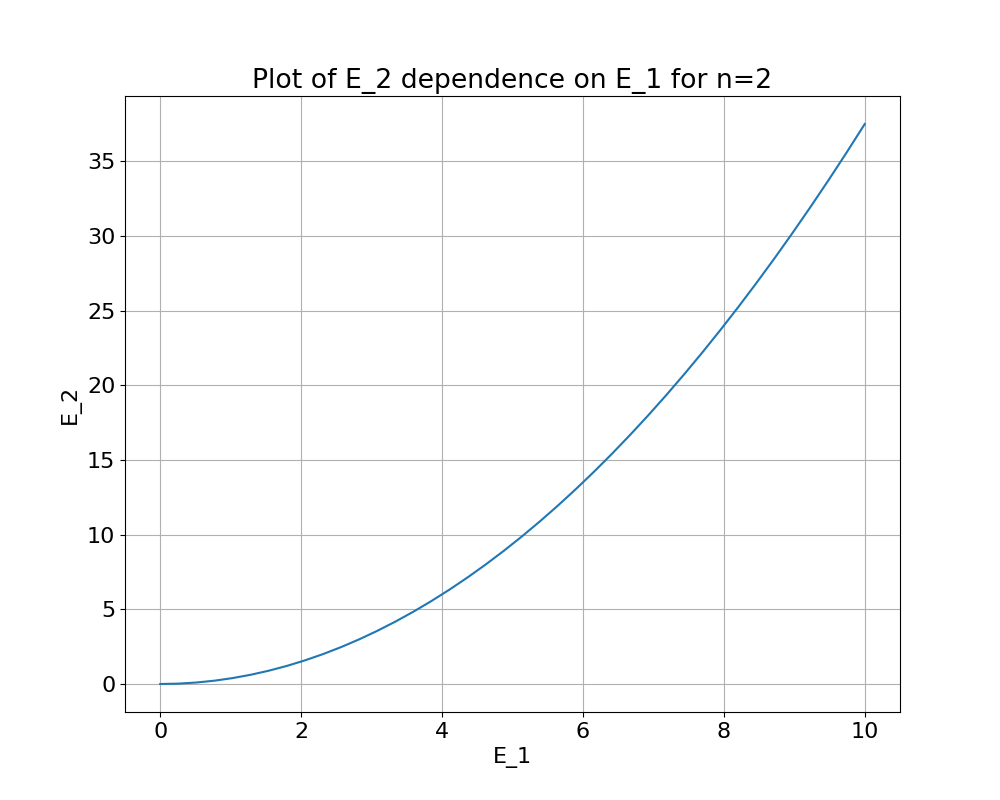

In [11]:
# Generate x values from 0 to 3
x_values = np.linspace(0, 10, 40)

min_y = list(map(functools.partial(run_function_with_constraints_and_equal, func_num=1+n, loc=0), x_values))

min_y_values = [-1*y.fun for y in min_y]

font = {'size': 16}
plt.rc('font', **font)

plt.figure(figsize=(10, 8))
plt.plot(x_values, min_y_values, color='C0')
#plt.plot(x_values, max_y_values, label='Max', color='C1')
#plt.plot(x_values, min_y_values, label='Min', color='C2')
#plt.axis([0, 7,-3, 15])

plt.title('Plot of E_2 dependence on E_1 for n=2')
plt.xlabel('E_1')
plt.ylabel('E_2')
plt.grid(True)
plt.savefig('niep_2_s1_s2.png', bbox_inches='tight')